# Description:                                                                                                                   
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Dataset url : https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Step 0: Import libraries and Dataset

In [44]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Importing dataset
dataset = pd.read_csv('tieuduong.csv')

# Step 1: Descriptive Statistics

In [57]:
# Preview data
dataset.head()

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  \
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [58]:
# Dataset dimensions - (rows, columns)
dataset.shape

(994, 14)

In [48]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         994 non-null    int64  
 1   No_Pation  994 non-null    int64  
 2   Gender     994 non-null    object 
 3   AGE        994 non-null    int64  
 4   Urea       994 non-null    float64
 5   Cr         994 non-null    int64  
 6   HbA1c      994 non-null    float64
 7   Chol       994 non-null    float64
 8   TG         994 non-null    float64
 9   HDL        994 non-null    float64
 10  LDL        994 non-null    float64
 11  VLDL       994 non-null    float64
 12  BMI        994 non-null    float64
 13  CLASS      994 non-null    object 
dtypes: float64(8), int64(4), object(2)
memory usage: 108.8+ KB


In [55]:
# Statistical summary
dataset.describe().T

count           mean           std    min       25%      50%   
ID         994.0     340.420523  2.404928e+02    1.0    125.00    301.5  \
No_Pation  994.0  269386.272636  3.390876e+06  123.0  24062.25  34392.5   
Gender       0.0            NaN           NaN    NaN       NaN      NaN   
AGE        994.0      53.527163  8.727829e+00   20.0     51.00     55.0   
Urea       994.0       5.113021  2.931780e+00    0.5      3.70      4.6   
Cr         994.0      68.792757  6.004176e+01    6.0     48.00     60.0   
HbA1c      994.0       8.286378  2.533583e+00    0.9      6.50      8.0   
Chol       994.0       4.861590  1.302404e+00    0.0      4.00      4.8   
TG         994.0       2.353028  1.404455e+00    0.3      1.50      2.0   
HDL        994.0       1.204879  6.619107e-01    0.2      0.90      1.1   
LDL        994.0       2.610553  1.117409e+00    0.3      1.80      2.5   
VLDL       994.0       1.838732  3.643433e+00    0.1      0.70      0.9   
BMI        994.0      29.571247  4.960280e+00   19.0     26.00     30.0   

                75%          max  
ID           549.75       800.00  
No_Pation  45379.50  75435657.00  
Gender          NaN          NaN  
AGE           59.00        79.00  
Urea           5.70        38.90  
Cr            73.00       800.00  
HbA1c         10.20        16.00  
Chol           5.60        10.30  
TG             2.90        13.80  
HDL            1.30         9.90  
LDL            3.30         9.90  
VLDL           1.50        35.00  
BMI           33.00        47.75

In [50]:
# Count of null values
dataset.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

## Observations:
1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<Axes: xlabel='CLASS', ylabel='count'>

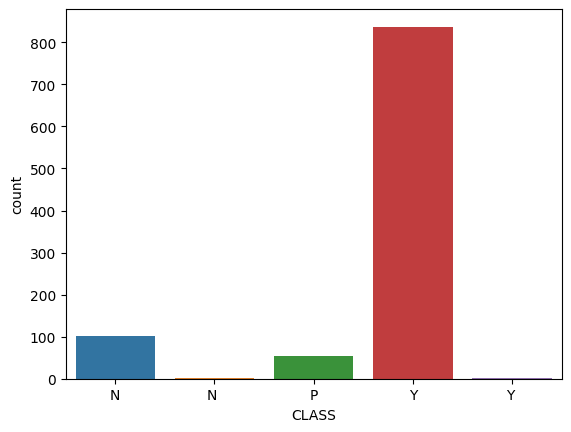

In [51]:
# Outcome countplot
import pandas as pd
import seaborn as sns

sns.countplot(x = 'CLASS',data = dataset)

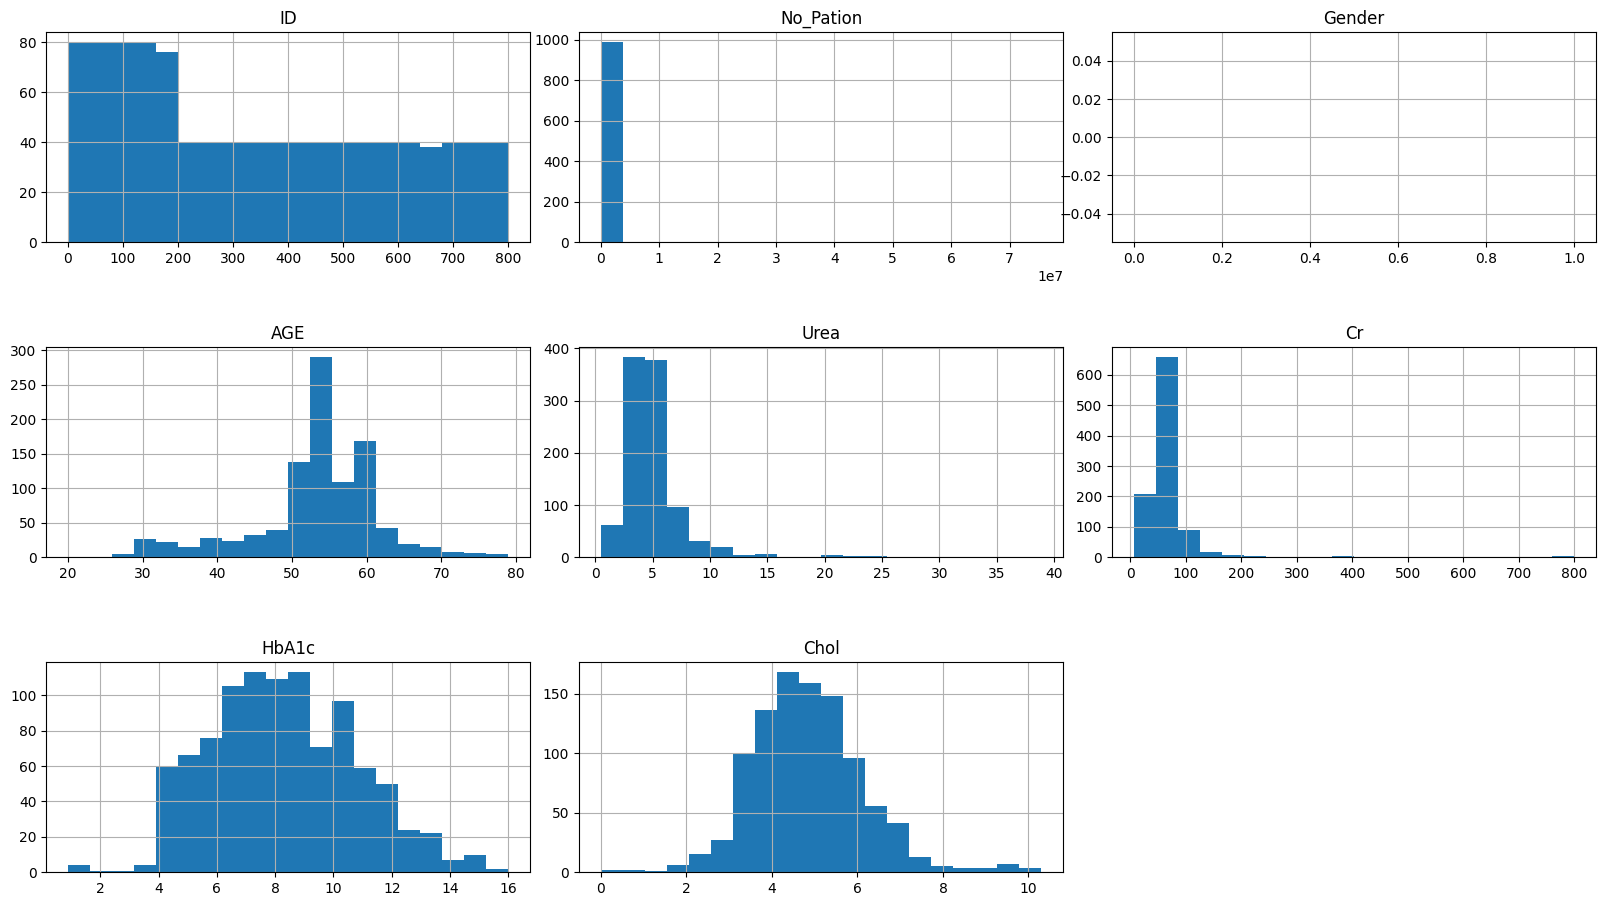

In [59]:
# Histogram of each feature
import itertools
import math
col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(math.ceil(length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i] = pd.to_numeric(dataset[i], errors='coerce')
    dataset[i].hist(bins=20)
    plt.title(i)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

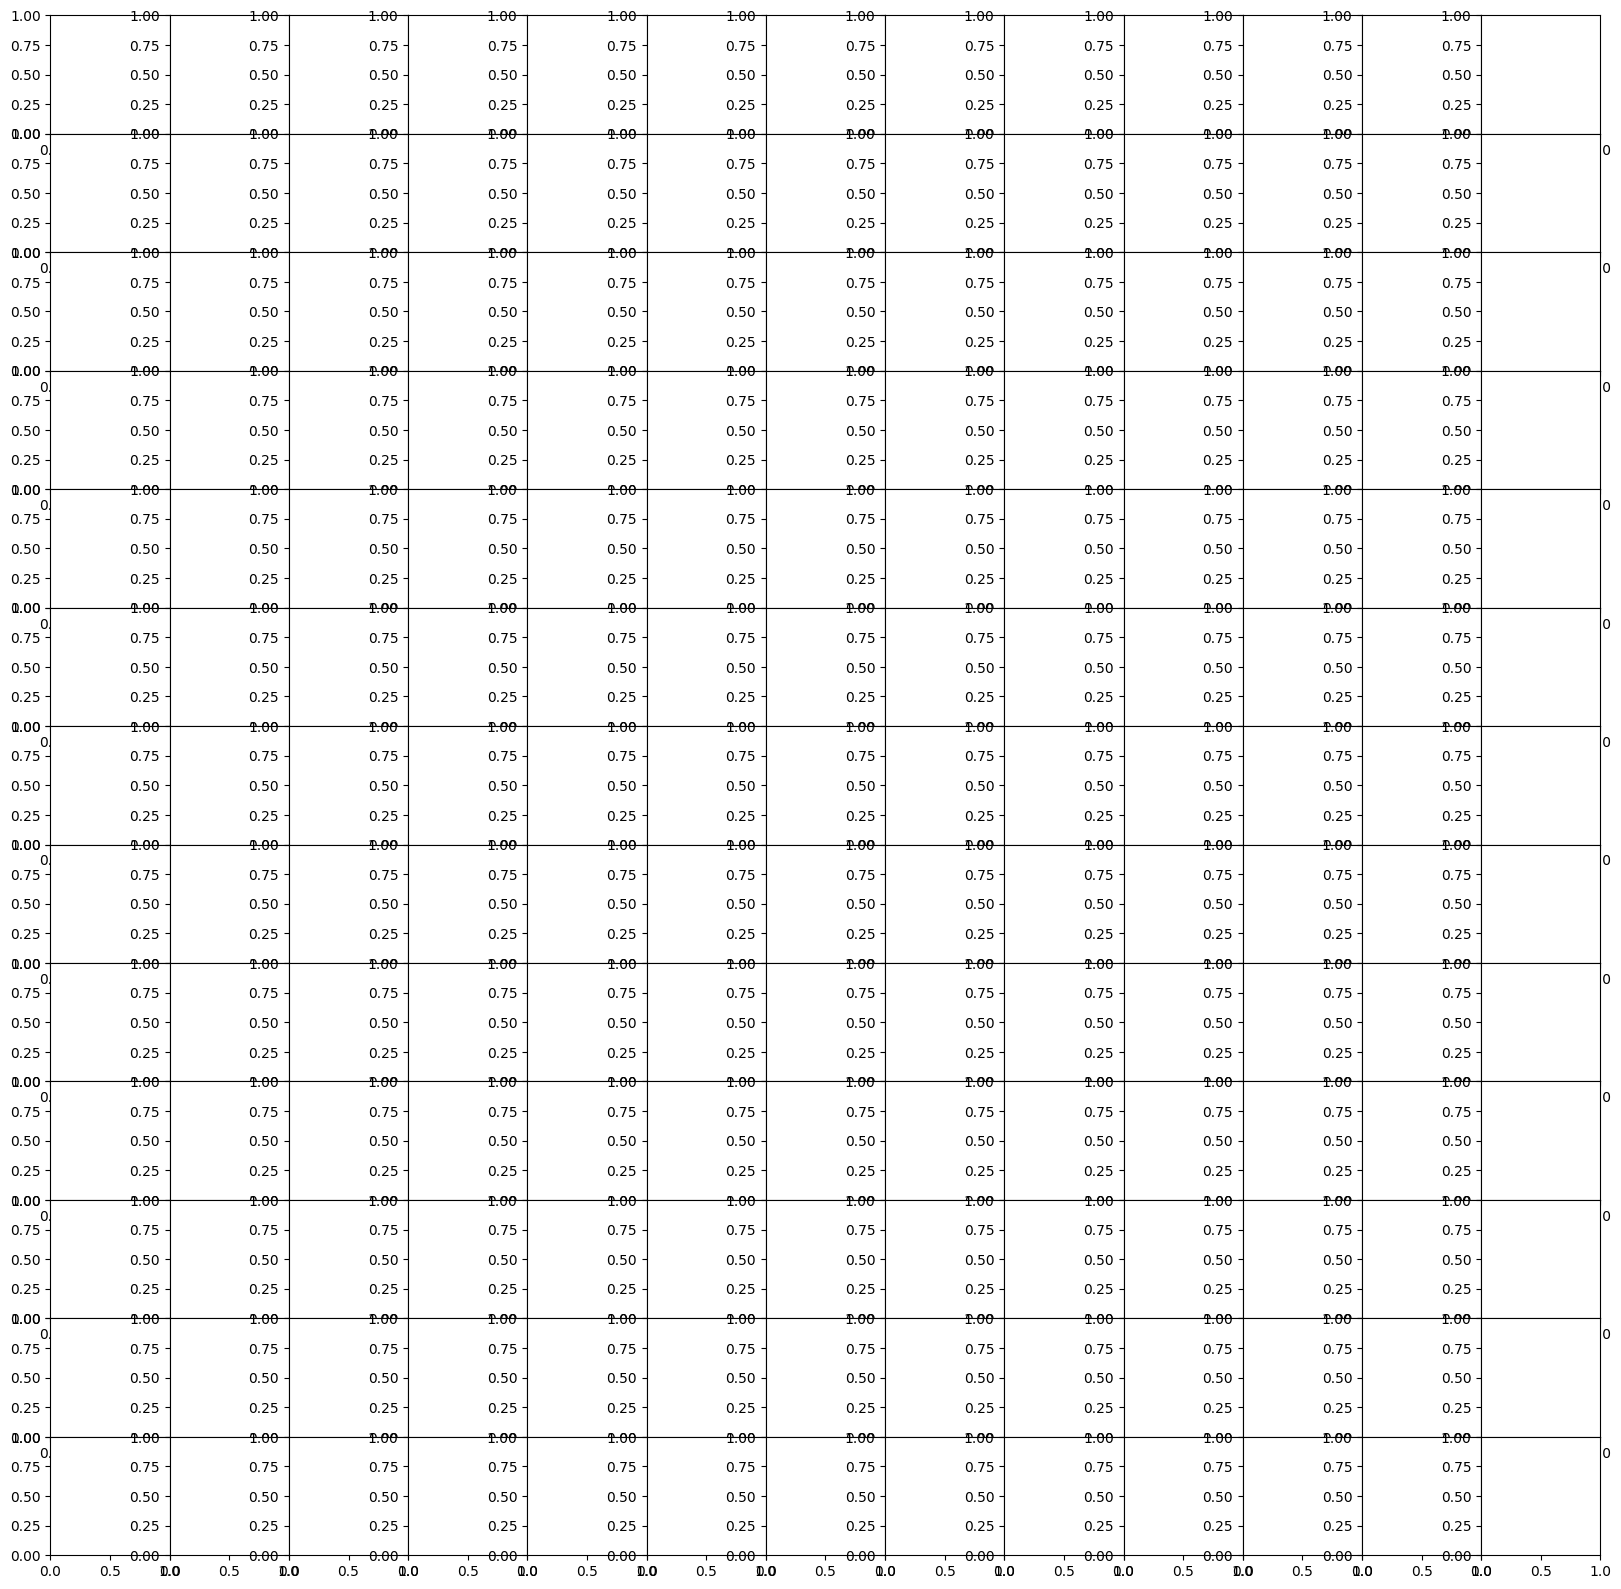

In [54]:
# Scatter plot matrix 
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

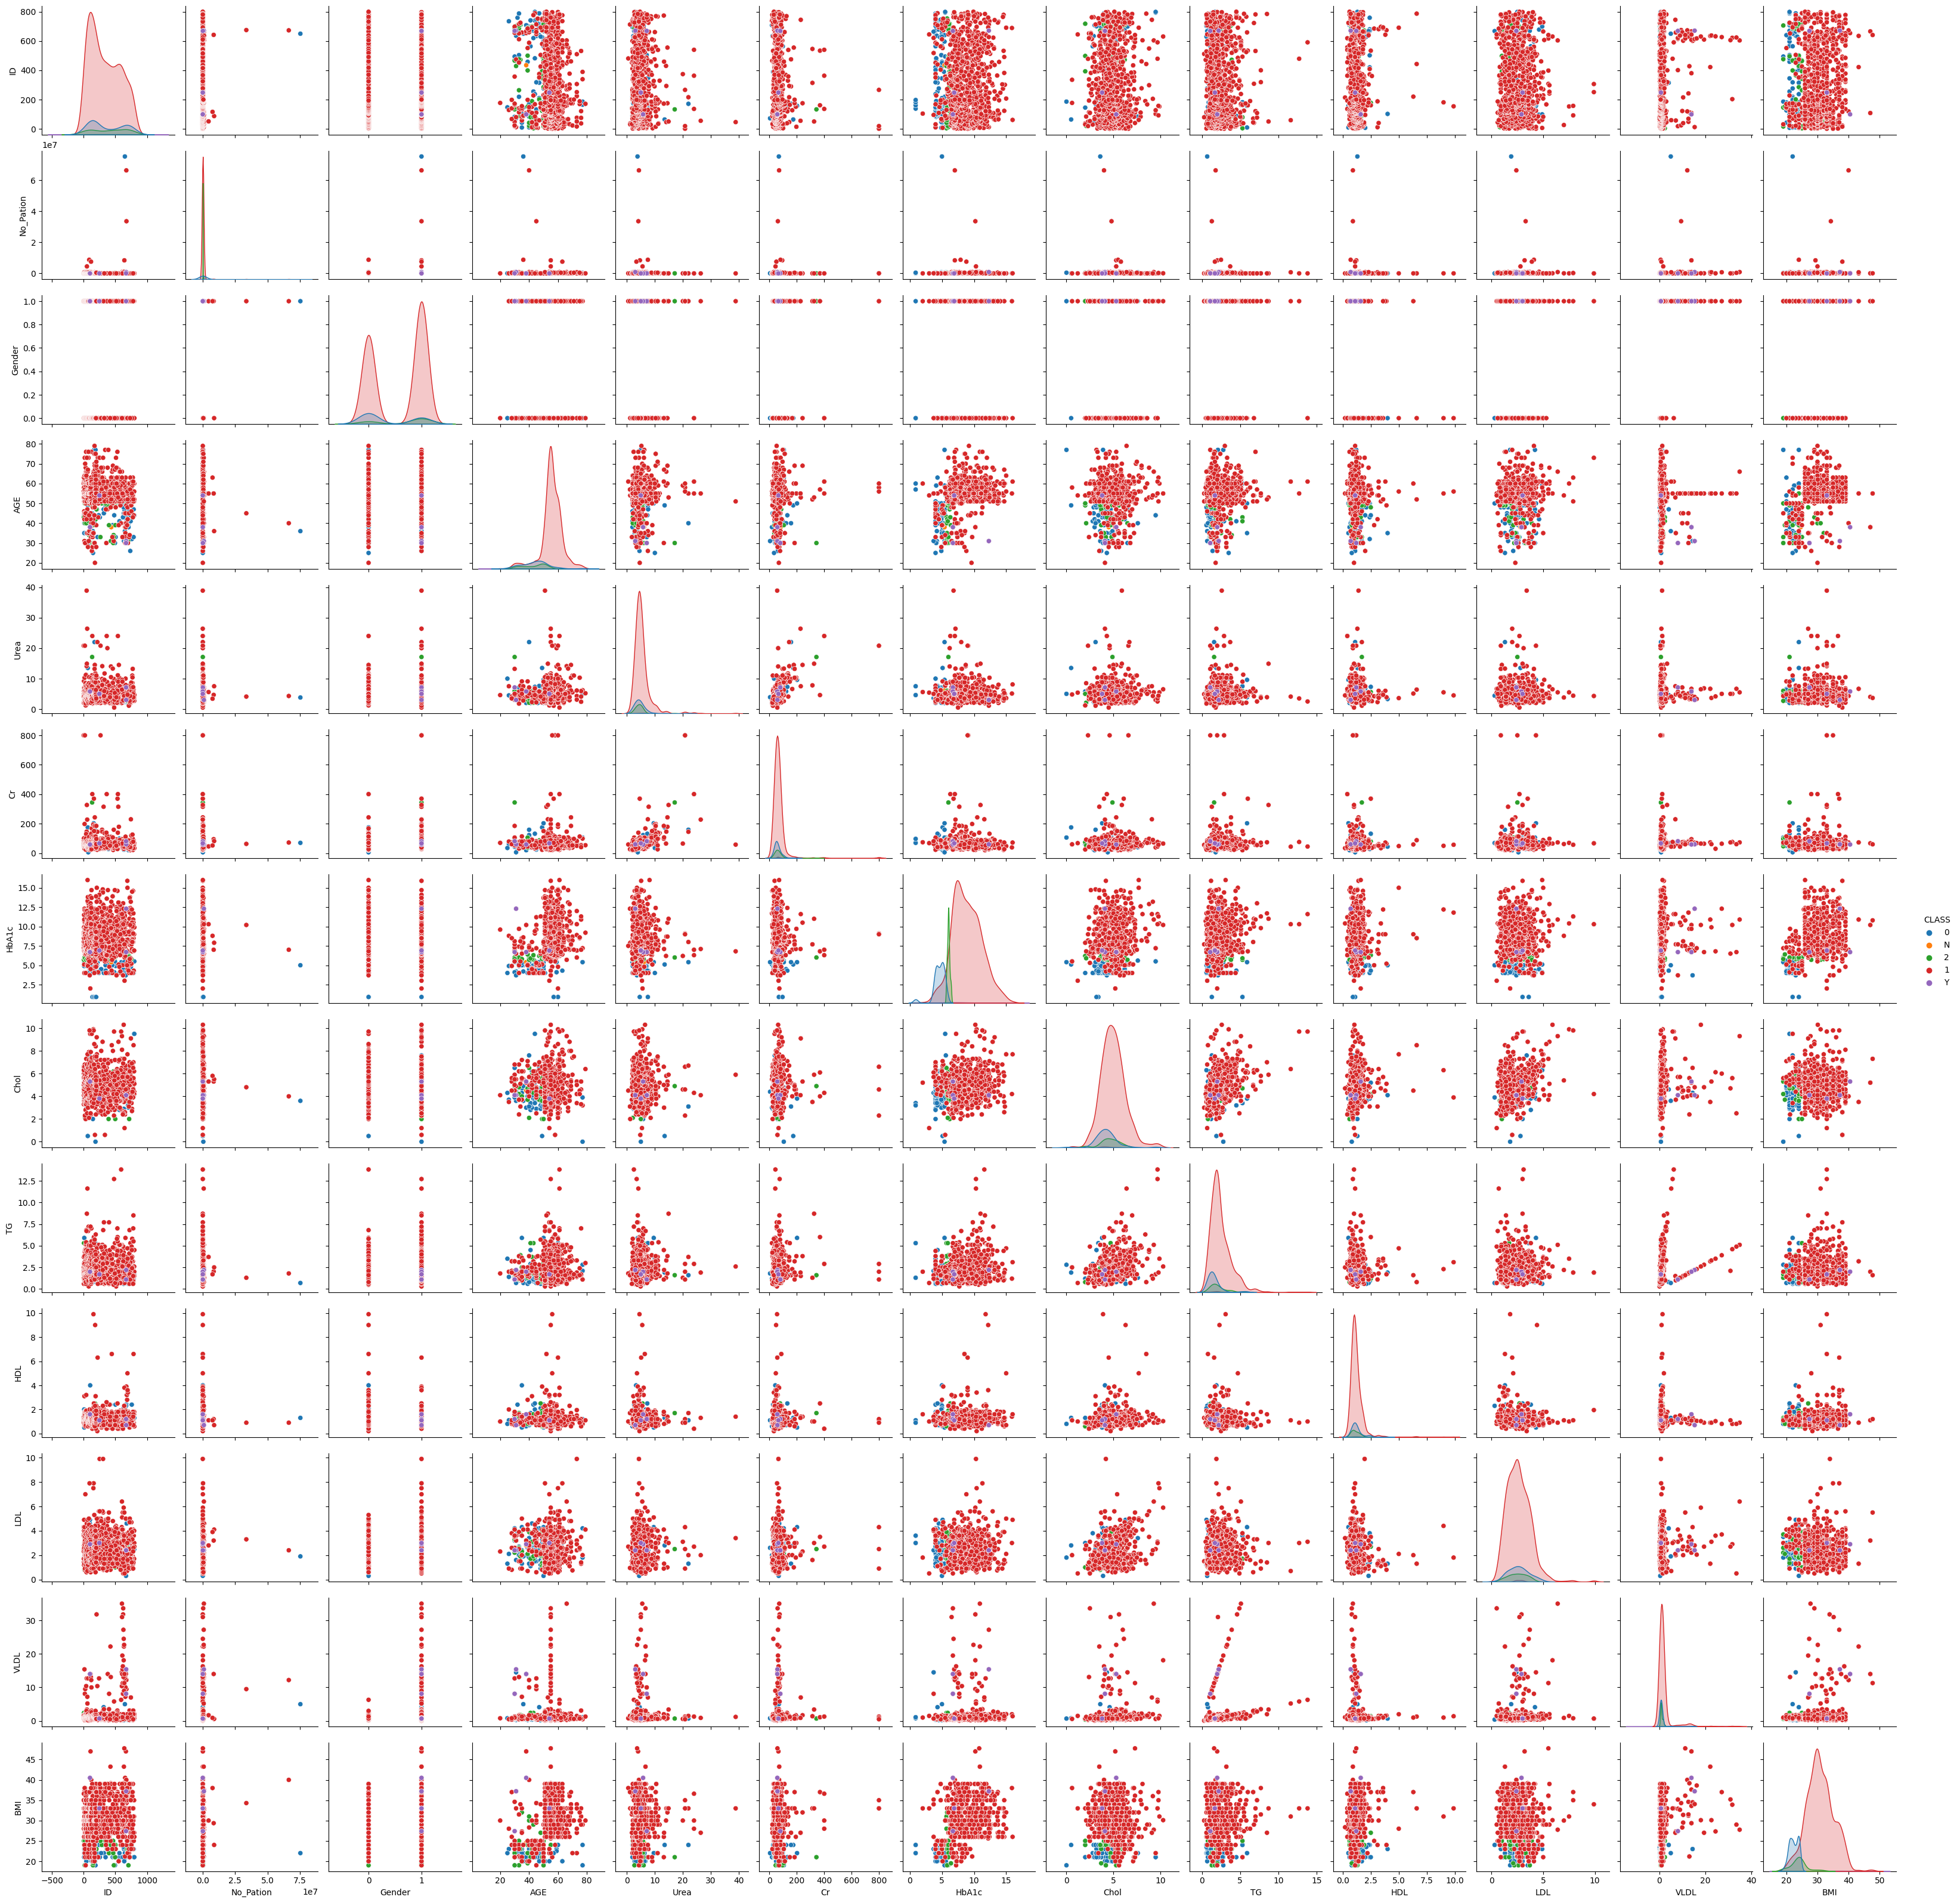

In [ ]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'CLASS')
plt.show()

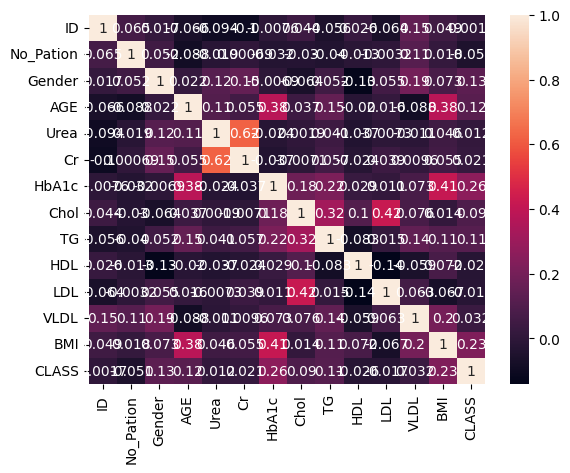

In [ ]:
# Heatmap
dataset['CLASS'] = pd.to_numeric(dataset['CLASS'], errors='coerce')

sns.heatmap(dataset.corr(), annot = True)
plt.show()

## Observations:
1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing

In [ ]:
dataset_new = dataset

In [ ]:
# Replacing zero values with NaN
dataset_new[["Urea", "Cr", "HbA1c", "Chol","TG","HDL","LDL","VLDL", "BMI"]] = dataset_new[["Urea", "Cr", "HbA1c", "Chol","TG","HDL","LDL","VLDL", "BMI"]].replace(0, np.NaN) 

In [ ]:
# Count of NaN
dataset_new.isnull().sum()

ID           0
No_Pation    0
Gender       1
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        5
dtype: int64

In [ ]:
# Replacing NaN with mean values
dataset_new["Urea"].fillna(dataset_new["Urea"].mean(), inplace = True)
dataset_new["Cr"].fillna(dataset_new["Cr"].mean(), inplace = True)
dataset_new["HbA1c"].fillna(dataset_new["HbA1c"].mean(), inplace = True)
dataset_new["Chol"].fillna(dataset_new["Chol"].mean(), inplace = True)
dataset_new["TG"].fillna(dataset_new["TG"].mean(), inplace = True)
dataset_new["HDL"].fillna(dataset_new["HDL"].mean(), inplace = True)
dataset_new["LDL"].fillna(dataset_new["LDL"].mean(), inplace = True)
dataset_new["VLDL"].fillna(dataset_new["VLDL"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [ ]:
# Statistical summary
dataset_new.describe().T

count           mean           std    min       25%      50%   
ID         1000.0     340.500000  2.403977e+02    1.0    125.75    300.5  \
No_Pation  1000.0  270551.408000  3.380758e+06  123.0  24063.75  34395.5   
Gender      999.0       0.565566  4.959308e-01    0.0      0.00      1.0   
AGE        1000.0      53.528000  8.799241e+00   20.0     51.00     55.0   
Urea       1000.0       5.124743  2.935165e+00    0.5      3.70      4.6   
Cr         1000.0      68.943000  5.998475e+01    6.0     48.00     60.0   
HbA1c      1000.0       8.281160  2.534003e+00    0.9      6.50      8.0   
Chol       1000.0       4.867688  1.292604e+00    0.5      4.00      4.8   
TG         1000.0       2.349610  1.401176e+00    0.3      1.50      2.0   
HDL        1000.0       1.204750  6.604136e-01    0.2      0.90      1.1   
LDL        1000.0       2.609790  1.115102e+00    0.3      1.80      2.5   
VLDL       1000.0       1.854700  3.663599e+00    0.1      0.70      0.9   
BMI        1000.0      29.578020  4.962388e+00   19.0     26.00     30.0   
CLASS       995.0       0.950754  3.918009e-01    0.0      1.00      1.0   

                75%          max  
ID           550.25       800.00  
No_Pation  45384.25  75435657.00  
Gender         1.00         1.00  
AGE           59.00        79.00  
Urea           5.70        38.90  
Cr            73.00       800.00  
HbA1c         10.20        16.00  
Chol           5.60        10.30  
TG             2.90        13.80  
HDL            1.30         9.90  
LDL            3.30         9.90  
VLDL           1.50        35.00  
BMI           33.00        47.75  
CLASS          1.00         2.00

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [ ]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [ ]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [3, 7, 8, 12]].values
Y = dataset_scaled.iloc[:, 13].values

In [ ]:
np.isnan(Y).sum()

5

In [ ]:
missing_data = dataset_new.isnull()

rows_with_missing_values = dataset_new[missing_data.any(axis=1)]

print(rows_with_missing_values)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   
102  435      34241     1.0   38   6.1  83    5.4   4.5  1.7  0.9  2.8   0.8  \
991  195       4543     NaN   55   4.1  34   13.9   5.4  1.6  1.6  3.1   0.7   
996  671     876534     1.0   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654     1.0   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004     1.0   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054     1.0   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
102  24.6    NaN  
991  33.0    1.0  
996  37.2    NaN  
997  27.4    NaN  
998  40.5    NaN  
999  33.0    NaN  


In [ ]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['CLASS'] )

ValueError: Input y contains NaN.

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Step 4: Data Modelling

In [ ]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

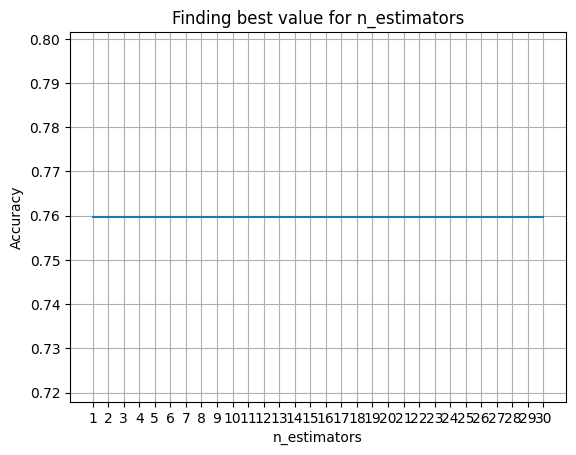

Highest value:  0.7597402597402597


In [ ]:
# Plotting a graph for n_neighbors 
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc_list = []
    acc_list = [metrics.accuracy_score(prediction, Y_test) for _ in range(len(X_axis))]
    acc = pd.Series(acc_list, index=X_axis)
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [ ]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [ ]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [ ]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


In [ ]:
#From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 78.57 %

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [20, 34]], dtype=int64)

<Axes: >

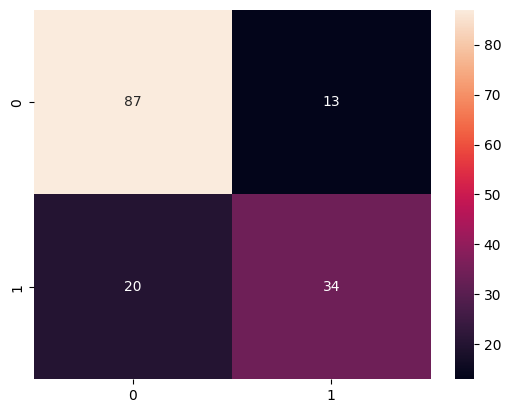

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
dataset = pd.read_csv('diabetes.csv')
print(dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import pickle
# In[2]:
dataset = pd.read_csv('diabetes.csv')
# # Step 3: Data Preprocessing

# In[13]:


dataset_X = dataset.iloc[:,[1, 4, 5, 7]].values
dataset_Y = dataset.iloc[:,8].values


# In[14]:


dataset_X


# In[15]:


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_X)


# In[16]:


dataset_scaled = pd.DataFrame(dataset_scaled)


# In[17]:


X = dataset_scaled
Y = dataset_Y


# In[18]:


X


# In[19]:


Y


# In[20]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['Outcome'] )


# # Step 4: Data Modelling

# In[25]:


from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)


# In[26]:


svc.score(X_test, Y_test)


# In[27]:


Y_pred = svc.predict(X_test)





pickle.dump(svc, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
#print(model.predict(sc.transform(np.array([[86, 66, 26.6, 31]]))))


